# Анализ на резултатите от теста 

В тази тетрадка ви покажа процесът по изготвяне на анализ на резултатите от теоретичния тест. Това е пример за т.нар. data-driven desicion making - взимане на решение на базата на данните. В случая решението как да бъдат оценени студентите и какво да се промени в следващия тест.

За анализа на оценките ще използваме две множества от данни - за първа и втора група. И двете множества ще минат през следните трансформации, за да могат да бъдат анализирани: 
    
1. Анонимизиране на данните - задължителна стъпка, ако работите с данни, съдържащи лична информация, и смятате да пускате анализа си публично
2. Премахване на незначителна информация
3. Преобразуване в подходящи типове 
4. Резюмиране на данните
5. Анализ и извод 

In [207]:
import pandas as pd
import seaborn as sns

# Група 1 

In [208]:
df1 = pd.read_csv("C492927S1-Теоретичен тест - 1 група-grades.csv", nrows=21) #21 студенти от тази група

In [209]:
df1.columns

Index(['Surname', 'First name', 'ID number', 'Email address', 'State',
       'Started on', 'Completed', 'Time taken', 'Grade/70.00', 'Q. 1 /2.00',
       'Q. 2 /4.00', 'Q. 3 /4.00', 'Q. 4 /4.00', 'Q. 5 /5.00', 'Q. 6 /4.00',
       'Q. 7 /6.00', 'Q. 8 /4.00', 'Q. 9 /8.00', 'Q. 10 /7.00', 'Q. 11 /7.00',
       'Q. 12 /3.00', 'Q. 13 /12.00'],
      dtype='object')

In [210]:
# Анонимизиране 
df1.drop(columns=['Surname', 'First name', 'ID number', 'Email address'], inplace=True)

Внимание! Ако изпуснете `inplace=True`, горния код ще ви върне таблица с премахнати тези колони, но няма да ги премахне от оригиналтана таблица (в случая - df_grupa1)

In [239]:
# Премахване на неважна информация 

In [212]:
df1.drop(columns=['State', 'Started on', 'Completed'], inplace=True)

In [213]:
df1

,Time taken,Grade/70.00,Q. 1 /2.00,Q. 2 /4.00,Q. 3 /4.00,Q. 4 /4.00,Q. 5 /5.00,Q. 6 /4.00,Q. 7 /6.00,Q. 8 /4.00,Q. 9 /8.00,Q. 10 /7.00,Q. 11 /7.00,Q. 12 /3.00,Q. 13 /12.00
0,24 mins 51 secs,58.67,2.0,4.0,2.67,2.0,5.0,4.00,6.0,0.00,8.00,7.00,7.00,3.0,8.0
1,37 mins 34 secs,35.67,2.0,2.0,2.67,0.0,0.0,4.00,0.0,4.00,2.00,0.00,7.00,3.0,9.0
2,36 mins 10 secs,58.33,2.0,4.0,2.67,0.0,5.0,2.67,2.0,4.00,8.00,7.00,7.00,3.0,11.0
3,22 mins 4 secs,52.67,2.0,2.0,2.67,4.0,5.0,4.00,6.0,4.00,8.00,0.00,0.00,3.0,12.0
4,23 mins 42 secs,59.33,2.0,4.0,2.67,2.0,5.0,2.67,4.0,4.00,4.00,7.00,7.00,3.0,12.0
5,50 mins,35.67,2.0,4.0,2.67,0.0,0.0,-,6.0,-,-,-,7.00,3.0,11.0
6,27 mins 5 secs,68.67,2.0,4.0,2.67,4.0,5.0,4.00,6.0,4.00,8.00,7.00,7.00,3.0,12.0
7,25 mins 39 secs,38.67,2.0,2.0,2.67,2.0,0.0,0.00,4.0,0.00,4.00,0.00,7.00,3.0,12.0
8,27 mins 27 secs,62.67,2.0,4.0,2.67,2.0,5.0,4.00,4.0,4.00,6.00,7.00,7.00,3.0,12.0
9,34 mins 50 secs,58.00,2.0,2.0,1.33,4.0,5.0,2.67,4.0,4.00,8.00,7.00,7.00,3.0,8.0


In [214]:
# 3. Преобразуване в повходящи типове

In [215]:
df_grupa1.dtypes

Time taken       object
Grade/70.00     float64
Q. 1 /2.00      float64
Q. 2 /4.00      float64
Q. 3 /4.00      float64
Q. 4 /4.00      float64
Q. 5 /5.00      float64
Q. 6 /4.00       object
Q. 7 /6.00      float64
Q. 8 /4.00       object
Q. 9 /8.00       object
Q. 10 /7.00      object
Q. 11 /7.00      object
Q. 12 /3.00     float64
Q. 13 /12.00    float64
dtype: object

Някои от колоните не са с правилния тип, тъй като има непопълнени отговори. За да ги обработим, първо ще преобразуваме всички стойности в числови, а тези, които не са числови - в NaN. Това правим с `pd.to_numeric`. 
След това ще заменим липсващите стойности с 0 с `fillna`. 

In [216]:
for col in ('Q. 1 /2.00',
       'Q. 2 /4.00', 'Q. 3 /4.00', 'Q. 4 /4.00', 'Q. 5 /5.00', 'Q. 6 /4.00',
       'Q. 7 /6.00', 'Q. 8 /4.00', 'Q. 9 /8.00', 'Q. 10 /7.00', 'Q. 11 /7.00',
       'Q. 12 /3.00', 'Q. 13 /12.00'): 
    df1[col] = pd.to_numeric(df1[col], errors='coerce').fillna(value=0)

За да сметнем времето без да си играем много, ще направим приближение - ще вземем минутите като цяло число и ще добавим 1, за да закръглим. 

In [217]:
def compute_minutes(time_string): 
    return int(time_string.split(" ")[0]) + 1 

In [218]:
df1["minutes_taken"] = df1["Time taken"].apply(compute_minutes)

In [219]:
df1.dtypes

Time taken        object
Grade/70.00      float64
Q. 1 /2.00       float64
Q. 2 /4.00       float64
Q. 3 /4.00       float64
Q. 4 /4.00       float64
Q. 5 /5.00       float64
Q. 6 /4.00       float64
Q. 7 /6.00       float64
Q. 8 /4.00       float64
Q. 9 /8.00       float64
Q. 10 /7.00      float64
Q. 11 /7.00      float64
Q. 12 /3.00      float64
Q. 13 /12.00     float64
minutes_taken      int64
dtype: object

Вече всички колони са в подходящи типове. 

In [221]:
# Резюмиране на данните
df1.describe()

,Grade/70.00,Q. 1 /2.00,Q. 2 /4.00,Q. 3 /4.00,Q. 4 /4.00,Q. 5 /5.00,Q. 6 /4.00,Q. 7 /6.00,Q. 8 /4.00,Q. 9 /8.00,Q. 10 /7.00,Q. 11 /7.00,Q. 12 /3.00,Q. 13 /12.00,minutes_taken
count,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,52.143810,2.0,2.952381,2.414762,2.380952,3.571429,3.302381,3.904762,2.666667,6.190476,3.333333,5.666667,2.619048,11.142857,29.238095
std,10.916418,0.0,1.359272,0.539181,1.627151,2.314550,1.237424,2.142540,1.932184,2.271983,3.582364,2.816617,0.973457,1.352247,8.215259
min,30.330000,2.0,0.000000,1.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,21.000000
25%,40.670000,2.0,2.000000,2.670000,2.000000,0.000000,2.670000,2.000000,0.000000,6.000000,0.000000,7.000000,3.000000,11.000000,23.000000
50%,58.000000,2.0,4.000000,2.670000,2.000000,5.000000,4.000000,4.000000,4.000000,6.000000,0.000000,7.000000,3.000000,12.000000,26.000000
75%,59.330000,2.0,4.000000,2.670000,4.000000,5.000000,4.000000,6.000000,4.000000,8.000000,7.000000,7.000000,3.000000,12.000000,35.000000
max,68.670000,2.0,4.000000,2.670000,4.000000,5.000000,4.000000,6.000000,4.000000,8.000000,7.000000,7.000000,3.000000,12.000000,51.000000


Виждаме, че:             
    1. На третия въпрос никой не е достигнал максималните точки.           
    2. На останалите въпроси над половината студенти са дали верни отговори.               
    2. Средно на студентите им е отнело около 26 минути да попълнят теста - т.е. даденото време за конкретните задачи е твърде много.        
    
    
Нека сега разгледаме по-подробно разпределението по точки и по време.

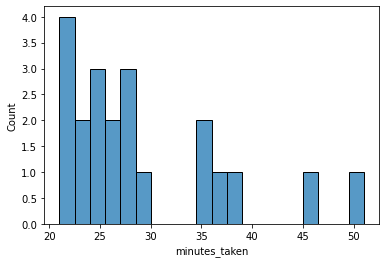

In [222]:
sns.histplot(df1["minutes_taken"], bins=20);

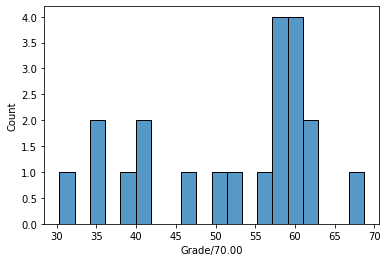

In [223]:
sns.histplot(df1["Grade/70.00"], bins=20);

Виждаме, че голям брой студенти имат оценка около 60. Там някъде е и границата между "Много добър" и "Отличен".

Един студент, за съжаление, има под половината точки (35), т.е. не минава теста.

И една много популярна графика в статистиката, която ни показва квантили и  извънредни стойности (outliers): 

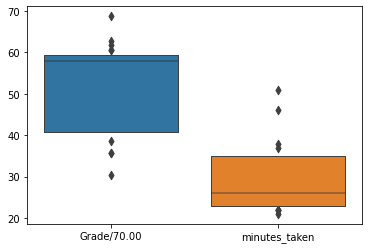

In [225]:
sns.boxenplot(data=df1[["Grade/70.00", "minutes_taken"]], scale='linear');

Има ли линейна връзка между двете? 

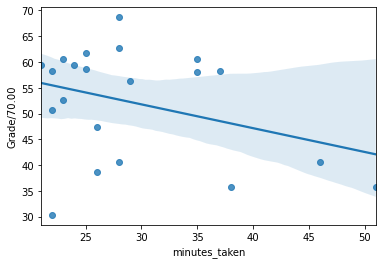

In [226]:
sns.regplot(x=df1["minutes_taken"], y=df1["Grade/70.00"]);

Виждаме, че не, точките са доста разпръснати, макар и преобладаващо, с увеличаването на времето да се намалява постигнатия резултат. 

# Група 2

In [227]:
df2 = pd.read_csv("C492927S1-Теоретичен тест - 2 група-grades.csv", nrows=17) #17 студенти от тази група 

In [228]:
#Премахмане на чувствителна и ненужна информация
df2.drop(columns=['Surname', 'First name', 'ID number', 'Email address', 'State', 'Started on', 'Completed'], inplace=True)

In [229]:
df2.columns

Index(['Time taken', 'Grade/70.00', 'Q. 1 /2.00', 'Q. 2 /4.00', 'Q. 3 /4.00',
       'Q. 4 /5.00', 'Q. 5 /3.00', 'Q. 6 /4.00', 'Q. 7 /4.00', 'Q. 8 /8.00',
       'Q. 9 /4.00', 'Q. 10 /7.00', 'Q. 11 /7.00', 'Q. 12 /6.00',
       'Q. 13 /12.00'],
      dtype='object')

In [230]:
# Преобразуване в правилните типове 
for col in ('Q. 1 /2.00', 'Q. 2 /4.00', 'Q. 3 /4.00',
       'Q. 4 /5.00', 'Q. 5 /3.00', 'Q. 6 /4.00', 'Q. 7 /4.00', 'Q. 8 /8.00',
       'Q. 9 /4.00', 'Q. 10 /7.00', 'Q. 11 /7.00', 'Q. 12 /6.00',
       'Q. 13 /12.00'): 
    df2[col] = pd.to_numeric(df2[col], errors='coerce').fillna(value=0)

In [231]:
df2["minutes_taken"] = df2["Time taken"].apply(compute_minutes)

In [232]:
df2.head()

,Time taken,Grade/70.00,Q. 1 /2.00,Q. 2 /4.00,Q. 3 /4.00,Q. 4 /5.00,Q. 5 /3.00,Q. 6 /4.00,Q. 7 /4.00,Q. 8 /8.00,Q. 9 /4.00,Q. 10 /7.00,Q. 11 /7.00,Q. 12 /6.00,Q. 13 /12.00,minutes_taken
0,31 mins 6 secs,13.67,0.0,0.67,2.0,0.0,0.0,4.00,0.00,0.0,0.0,0.0,0.0,2.0,5.0,32
1,31 mins 33 secs,62.00,2.0,2.00,2.0,5.0,3.0,4.00,4.00,8.0,4.0,7.0,7.0,2.0,12.0,32
2,33 mins 55 secs,65.00,2.0,4.00,2.0,5.0,3.0,4.00,4.00,8.0,4.0,7.0,7.0,4.0,11.0,34
3,12 mins 54 secs,19.33,2.0,0.00,2.0,0.0,0.0,4.00,1.33,4.0,0.0,0.0,0.0,0.0,6.0,13
4,31 mins 45 secs,21.00,2.0,0.67,2.0,5.0,0.0,0.67,2.67,0.0,0.0,0.0,0.0,2.0,6.0,32


In [240]:
# Резюмиране
df2.describe()

,Grade/70.00,Q. 1 /2.00,Q. 2 /4.00,Q. 3 /4.00,Q. 4 /5.00,Q. 5 /3.00,Q. 6 /4.00,Q. 7 /4.00,Q. 8 /8.00,Q. 9 /4.00,Q. 10 /7.00,Q. 11 /7.00,Q. 12 /6.00,Q. 13 /12.00,minutes_taken
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,54.725882,1.882353,3.059412,2.941176,3.823529,2.470588,3.608235,3.294706,6.352941,2.588235,5.352941,4.529412,4.117647,10.705882,29.529412
std,18.380588,0.485071,1.545693,0.826936,2.186187,1.178858,1.105912,1.165869,2.688842,1.970369,3.060661,3.448145,1.932691,2.468925,7.332442
min,13.670000,0.000000,0.000000,2.000000,0.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000
25%,56.000000,2.000000,2.000000,2.000000,5.000000,3.000000,4.000000,2.670000,5.330000,0.000000,7.000000,0.000000,2.000000,11.000000,28.000000
50%,63.000000,2.000000,4.000000,3.000000,5.000000,3.000000,4.000000,4.000000,8.000000,4.000000,7.000000,7.000000,4.000000,12.000000,32.000000
75%,66.000000,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,8.000000,4.000000,7.000000,7.000000,6.000000,12.000000,34.000000
max,68.670000,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,8.000000,4.000000,7.000000,7.000000,6.000000,12.000000,42.000000


Виждаме, че макар да имат по-нисък минимум, точките в тази група са по-високи. (Което е нормално, тъй като студентите са имали възможност да получат информация за теста от колегите си от първа група.)

Средното време вече е 32 минути, което отново е доста по-малко от максимума. 

Нека отново видим подробните разпределения по време и точки: 

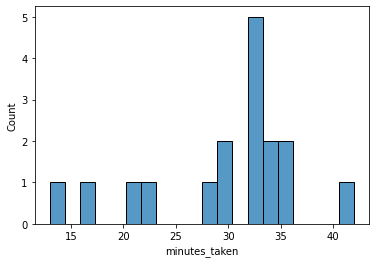

In [234]:
sns.histplot(df2["minutes_taken"], bins=20);

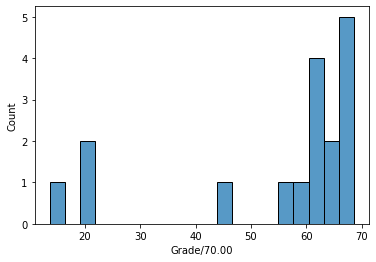

In [235]:
sns.histplot(df2["Grade/70.00"], bins=20);

Виждаме доста по-различно разпределение. В тази група имаме повече участници, които не са се справили с теста (трима имат под 50%), но и повече, които са го решили почти безупречно.

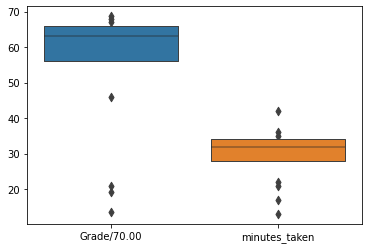

In [237]:
sns.boxenplot(data=df2[["Grade/70.00", "minutes_taken"]], scale='linear');

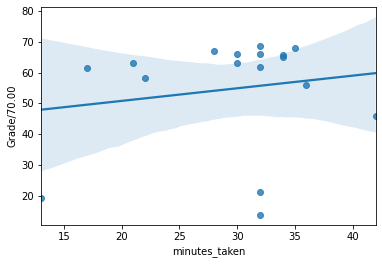

In [238]:
sns.regplot(x=df2["minutes_taken"], y=df2["Grade/70.00"]);

Тук виждаме обратната зависимост - с увеличаването на времето и точките леко се увеличават. 

Защо се получава тази разлика? Защото размерът на данните е твърде малък - с по едва 21 и 17 примера не може да се направи статистическо обобщение. 
(Напр. защото просто е възможно по-силните студенти масово да са се явили във втора група и да изкривяват статистиката. Шансът за такова обстоятелство е много по-малък, ако имаме по 100-200 студенти в група.)

# Изводи 

От посоченият анализ могат да се направят следните обобщения: 

1. За да получим сходно разпределение, можем да намалим леко прага за отлична оценка на студентите от 1 група. 
2. В бъдеще е добре тестът да е с повече въпроси, за да се използва времето. 
3. В бъдеще е добре двете групи да работят едновременно, за да може резултатите им да се влияят по-малко от външни фактори (като пренасянето на информация от студенти от едната група към другата). 

### И така, да дойдем до скалата: 

Оценката се смята като от броят точки извадите 5т. и разделите на 10. 

Под 35 т - слаб 2.     
35 - 40 т. - среден 3.    
40-50 т. - добър 4.    
50-60 т. - много добър 5.    
60-70 т. - отличен 6.     

За първа група минимума за 6 е 58 т. 

Хората с под 50% (35 т.) не са допуснати до правене на проект (тъй като нямат необходимите базови познания). 

Не се притеснявайте (или радвайте твърде много), ако сте някъде по границите, представянето ви на проекта и по време на учебните занятия имат повече тежест.

Успех!